## Random Forest Decision Tree
This model employs a Random Forest Regressor Decision Tree algorithm to predict retail coffe price bassed on economic metrics such as  supply, trade, inventories, consumption, energy costs, and commodity pricing data. Data was obtained from International Coffee Organization (The ICO Historic Data). 

### Scoring Metrics:
- Training Data Score: 0.9597823614739235
- Testing Data Score: 0.8959434042614792
- MSE:  0.12347079250000448
- RMSE:  0.06173539625000224

In [1]:
# Dependencies
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import numpy as np
from sklearn import tree
import os
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [3]:
# import processed data
path = "Trends/"
file = "finalFeatures.csv"
path_file = path + file
df = pd.read_csv(path_file)
df

,Year,Brent ave closing USD,Coffe Export (In 1K 60-kg bags) crop year,Coffe Imports (In 1K 60-kg bags) Calendar Year 137c,Coffe Produciton (In 1K 60-kg bags) crop year,Domestic Consumption (In 1K 60-kg bags),ICO composite (USD $/lb),Inventories (In 1K 60-kg bags),re-exports (In 1K 60-kg bags) Calendar Year 35c,WTI ave closing price USD,retail
0,1990,23.76,73887,100082,93230,19509,0.72,15619,8769,24.53,4.53
1,1991,20.04,79768,97310,101269,20228,0.67,13200,9770,21.54,4.48
2,1992,19.32,76957,103653,98523,20951,0.53,16843,10691,20.58,4.53
3,1993,17.01,74130,101530,91762,21098,0.62,14218,11041,18.43,4.03
4,1994,15.86,65962,100811,93314,21360,1.34,12667,12833,17.20,4.59
5,1995,17.02,74253,95216,87318,22603,1.38,7905,11539,18.43,6.03
6,1996,20.64,81884,103284,103306,23513,1.02,6494,12485,22.12,5.68
7,1997,19.11,77962,108001,99861,24271,1.34,6896,14136,20.61,5.35
8,1998,12.76,82872,109718,108892,25117,1.09,6601,15135,14.42,5.31
9,1999,17.90,92405,116301,131385,25741,0.86,8601,15331,19.35,4.83


In [4]:
df.shape

(29, 11)

In [5]:
# Optimize data
df = df.drop(columns =['Coffe Imports (In 1K 60-kg bags) Calendar Year 137c',
                  ])
df

,Year,Brent ave closing USD,Coffe Export (In 1K 60-kg bags) crop year,Coffe Produciton (In 1K 60-kg bags) crop year,Domestic Consumption (In 1K 60-kg bags),ICO composite (USD $/lb),Inventories (In 1K 60-kg bags),re-exports (In 1K 60-kg bags) Calendar Year 35c,WTI ave closing price USD,retail
0,1990,23.76,73887,93230,19509,0.72,15619,8769,24.53,4.53
1,1991,20.04,79768,101269,20228,0.67,13200,9770,21.54,4.48
2,1992,19.32,76957,98523,20951,0.53,16843,10691,20.58,4.53
3,1993,17.01,74130,91762,21098,0.62,14218,11041,18.43,4.03
4,1994,15.86,65962,93314,21360,1.34,12667,12833,17.20,4.59
5,1995,17.02,74253,87318,22603,1.38,7905,11539,18.43,6.03
6,1996,20.64,81884,103306,23513,1.02,6494,12485,22.12,5.68
7,1997,19.11,77962,99861,24271,1.34,6896,14136,20.61,5.35
8,1998,12.76,82872,108892,25117,1.09,6601,15135,14.42,5.31
9,1999,17.90,92405,131385,25741,0.86,8601,15331,19.35,4.83


In [6]:
df.shape

(29, 10)

In [7]:
# Create dataframe for running decision tree
# This was done to upload existing code with similar variables
# Main Data set: data_df

data_df = df.drop("retail", axis=1)
target = df["retail"]
Years = df["Year"]


feature_names = data_df.columns
data_df.head()

,Year,Brent ave closing USD,Coffe Export (In 1K 60-kg bags) crop year,Coffe Produciton (In 1K 60-kg bags) crop year,Domestic Consumption (In 1K 60-kg bags),ICO composite (USD $/lb),Inventories (In 1K 60-kg bags),re-exports (In 1K 60-kg bags) Calendar Year 35c,WTI ave closing price USD
0,1990,23.76,73887,93230,19509,0.72,15619,8769,24.53
1,1991,20.04,79768,101269,20228,0.67,13200,9770,21.54
2,1992,19.32,76957,98523,20951,0.53,16843,10691,20.58
3,1993,17.01,74130,91762,21098,0.62,14218,11041,18.43
4,1994,15.86,65962,93314,21360,1.34,12667,12833,17.20


In [8]:
# Years

In [9]:
# Create dataframe for running decision tree
# This was done to upload existing code with similar variables
# Main Data set: data_df

x = df.drop("retail", axis=1)
y = df["retail"]
target = y
data_df = x
print(x.shape)
print(y.shape)

(29, 9)
(29,)


Old Code. Should not work past this point with curretn data set.

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=42)

In [11]:
#from sklearn.ensemble import RandomForestRegressor
Econ_model = RandomForestRegressor(n_estimators=200)
Econ_model = Econ_model.fit(X_train, y_train)
Econ_model.score(X_test, y_test)

0.9227938180712023

In [12]:
print('Test Acc: %.3f' % Econ_model.score(X_test, y_test))

Test Acc: 0.923


In [13]:
print(f"Training Data Score: {Econ_model.score(X_train, y_train)}")
print(f"Testing Data Score: {Econ_model.score(X_test, y_test)}")

Training Data Score: 0.9665336561000787
Testing Data Score: 0.9227938180712023


In [14]:
sorted(zip(Econ_model.feature_importances_, feature_names), reverse=True)

[(0.5281023468486421, 'ICO composite (USD $/lb)'),
 (0.07646812160171926, 'Domestic Consumption (In 1K 60-kg bags)'),
 (0.07474991183325454, 'Brent ave closing USD'),
 (0.07116828164587959, 'Coffe Produciton (In 1K 60-kg bags) crop year'),
 (0.06504428812712719, 're-exports (In 1K 60-kg bags) Calendar Year 35c'),
 (0.056340482050568186, 'Year'),
 (0.04725292355017324, 'Coffe Export (In 1K 60-kg bags) crop year'),
 (0.04562159323842238, 'Inventories (In 1K 60-kg bags)'),
 (0.03525205110421366, 'WTI ave closing price USD')]

In [15]:
ypred = Econ_model.predict(X_test)

mse = mean_squared_error(y_test, ypred)
print("MSE: ", mse)
print("RMSE: ", mse*(1/2.0)) 

# Taken from refrence
# Target MSE:  0.130713987032462
# Target RMSE:  0.065356993516231 

MSE:  0.09161080468750384
RMSE:  0.04580540234375192


In [16]:
print(f"train set shape: {y_test.shape}")
print(f"Test set shape:  {ypred.shape}")

train set shape: (8,)
Test set shape:  (8,)


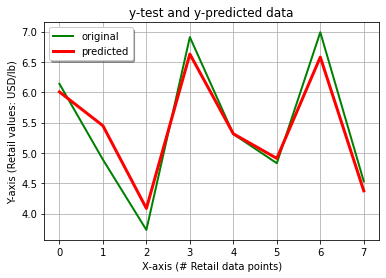

In [17]:
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, linewidth=2, label="original", color ="green")
plt.plot(x_ax, ypred, linewidth=3.0, label="predicted", color = "red")
plt.title("y-test and y-predicted data")
plt.xlabel('X-axis (# Retail data points)')
plt.ylabel('Y-axis (Retail values: USD/lb)')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [18]:
 # save your model by updating "your_name" with your name
# and "your_model" with your model variable
# be sure to turn this in to BCS
# if joblib fails to import, try running the command to install in terminal/git-bash
import joblib
filename = 'z1_Economic_model.sav'
joblib.dump(Econ_model, filename)

['z1_Economic_model.sav']

In [19]:
y_pred_bs = Econ_model.predict(data_df)

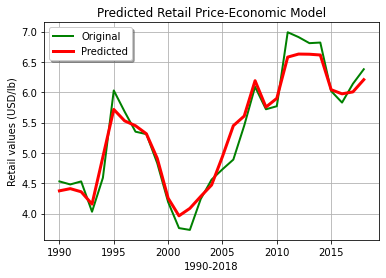

In [21]:
x_ax = Years
plt.plot(x_ax, target, linewidth=2, label="Original", color ="green")
plt.plot(x_ax, y_pred_bs, linewidth=3.0, label="Predicted", color = "red")
plt.title("Predicted Retail Price-Economic Model")
plt.xlabel('1990-2018')
plt.ylabel('Retail values (USD/lb)')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.savefig('Econimic_model.png')
plt.show() 